<a href="https://colab.research.google.com/github/Manviaggar/Prime-Vision/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 11.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")


100%|██████████| 49.7M/49.7M [00:00<00:00, 208MB/s]


In [6]:
results=model.predict("https://media.dev.to/cdn-cgi/image/width=800%2Cheight=%2Cfit=scale-down%2Cgravity=auto%2Cformat=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Farticles%2Fwr8bm7gga15xp9gfz7yz.jpg")

100%|██████████| 33.9k/33.9k [00:00<00:00, 4.57MB/s]


image 1/1 /content/wr8bm7gga15xp9gfz7yz.jpg: 448x640 1 cat, 1 dog, 1350.6ms
Speed: 20.5ms preprocess, 1350.6ms inference, 43.9ms postprocess per image at shape (1, 3, 448, 640)


In [11]:
result = results[0]
len(result.boxes)
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)




Object type: 16.0
Coordinates: [261.1693420410156, 94.34662628173828, 460.5357971191406, 313.0111389160156]
Probability: 0.9527170658111572


In [12]:
print(result.names)


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [15]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)




Object type: dog
Coordinates: [261, 94, 461, 313]
Probability: 0.95


In [16]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")


Object type: dog
Coordinates: [261, 94, 461, 313]
Probability: 0.95
---
Object type: cat
Coordinates: [140, 170, 256, 316]
Probability: 0.92
---


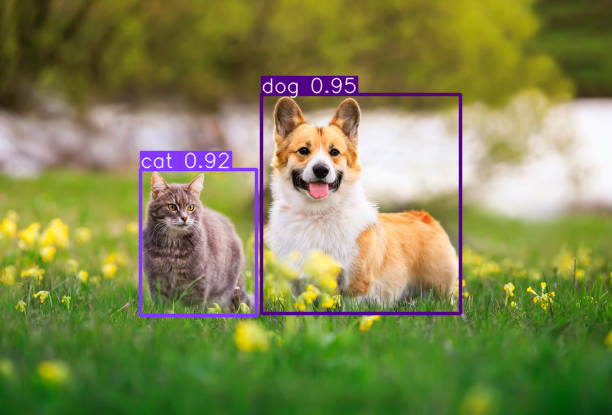

In [17]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])